Importing All the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipyleaflet import Map,Marker

Loading the dataframe

In [2]:
data = pd.read_csv('globallandslides.csv')

Inspect Data for better visualisation

In [3]:
data = pd.read_csv('globallandslides.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count             9648 non-null   flo

In [4]:
data.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


Extraction of Indian dataset and Landslide only

In [5]:
indian_dataset = data[(data['country_code']=='IN') & (data['landslide_category'] == 'landslide')]
indian_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 32 to 9872
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                1102 non-null   object 
 1   source_link                1087 non-null   object 
 2   event_id                   1102 non-null   int64  
 3   event_date                 1102 non-null   object 
 4   event_time                 0 non-null      float64
 5   event_title                1102 non-null   object 
 6   event_description          1097 non-null   object 
 7   location_description       1091 non-null   object 
 8   location_accuracy          1102 non-null   object 
 9   landslide_category         1102 non-null   object 
 10  landslide_trigger          1102 non-null   object 
 11  landslide_size             1102 non-null   object 
 12  landslide_setting          1102 non-null   object 
 13  fatality_count             865 non-null    floa

In [6]:
indian_dataset.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1055,07/22/2009 12:00:00 AM,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,...,IN,Bengal,46427.0,Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1054,07/22/2009 12:00:00 AM,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,...,IN,Bengal,46427.0,Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200
45,Telegraph India,https://www.telegraphindia.com/1090707/jsp/sil...,1061,07/01/2009 05:40:00 AM,NaN,Bridge destroyed at 4th Mile,Landslides triggered by heavy rains hit an iro...,"4th Mile, Lower Mangshila in North Sikkim",1km,landslide,...,IN,NaN,1464.0,Mangan,3.54100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.527000,27.478000
59,E-Pao,http://www.e-pao.net/GP.asp?src=28..210810.aug10,2164,07/29/2010 11:00:00 PM,NaN,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",Since the Chingai-Quingai road has been sunk d...,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",25km,landslide,...,IN,Manipur,15118.0,Phek,39.51186,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,94.482147,25.309863
62,ibnlive.in,http://ibnlive.in.com/generalnewsfeed/news/two...,3821,07/21/2011 12:00:00 AM,NaN,"Kumaon, Uttarakhand","Dehradun, July 21 (PTI) Two persons were kille...","Kumaon, Uttarakhand",25km,landslide,...,IN,Uttarakhand,32442.0,Almora,15.27100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,79.636700,29.733400


## Task-1  A map of all landslides that have happened within India

In [7]:
basic_map = Map(zoom=6, center=(20.5937, 78.9629))
for (index,row) in indian_dataset.iterrows():
    marker = Marker(location = [row.loc['latitude'], row.loc['longitude']], draggable= False, title = row.loc['gazeteer_closest_point'])
    basic_map.add_layer(marker)
display(basic_map)

Map(center=[20.5937, 78.9629], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

## Task-2  A plot showing the total number of landslides that have happened in India every year

In [8]:
time_arr = []
for i in (indian_dataset.__getitem__('event_date')):
    time_arr.append(i[6:10])
(unique, counts) = np.unique(time_arr, return_counts=True)
print(unique, counts)

['2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'] [ 66  46  48 226 151  75 170  68 184  68]


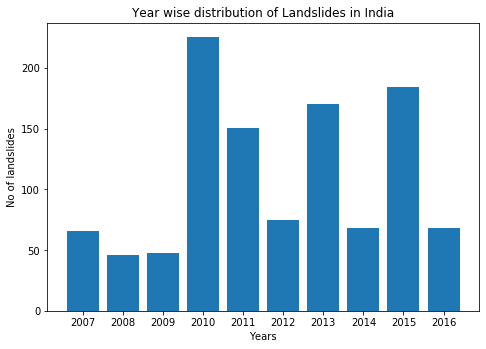

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
ax.set_title('Year wise distribution of Landslides in India')
ax.set_ylabel('No of landslides')
ax.set_xlabel('Years')
plt.show()